In [49]:
import pandas as pd

file = 'telecom.csv'
telecom_data = pd.read_csv(file)

telecom_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


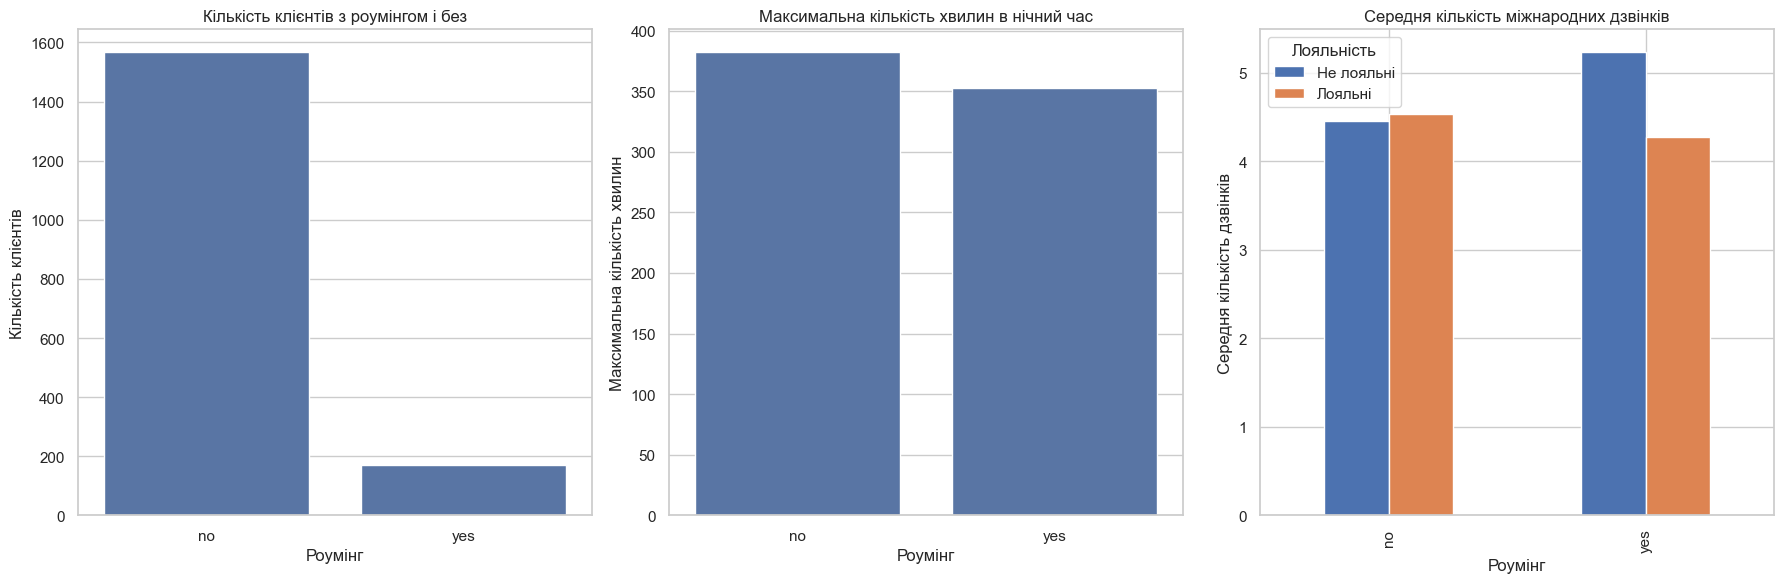

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. The number of clients with and without international roaming
roaming_counts = telecom_data['international plan'].value_counts()

# 2. Maximum night minutes for clients with and without international roaming
max_night_minutes = telecom_data.groupby('international plan')['total night minutes'].max()

# 3. Average number of international calls for clients with and without international roaming
# and considering loyalty (churn)
avg_intl_calls = telecom_data.groupby(['international plan', 'churn'])['total intl calls'].mean()

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting
sns.barplot(ax=axes[0], x=roaming_counts.index, y=roaming_counts.values)
axes[0].set_title('Кількість клієнтів з роумінгом і без')
axes[0].set_xlabel('Роумінг')
axes[0].set_ylabel('Кількість клієнтів')

sns.barplot(ax=axes[1], x=max_night_minutes.index, y=max_night_minutes.values)
axes[1].set_title('Максимальна кількість хвилин в нічний час')
axes[1].set_xlabel('Роумінг')
axes[1].set_ylabel('Максимальна кількість хвилин')

avg_intl_calls.unstack().plot(kind='bar', ax=axes[2])
axes[2].set_title('Середня кількість міжнародних дзвінків')
axes[2].set_xlabel('Роумінг')
axes[2].set_ylabel('Середня кількість дзвінків')
axes[2].legend(title='Лояльність', labels=['Не лояльні', 'Лояльні'])

plt.tight_layout()
plt.show()

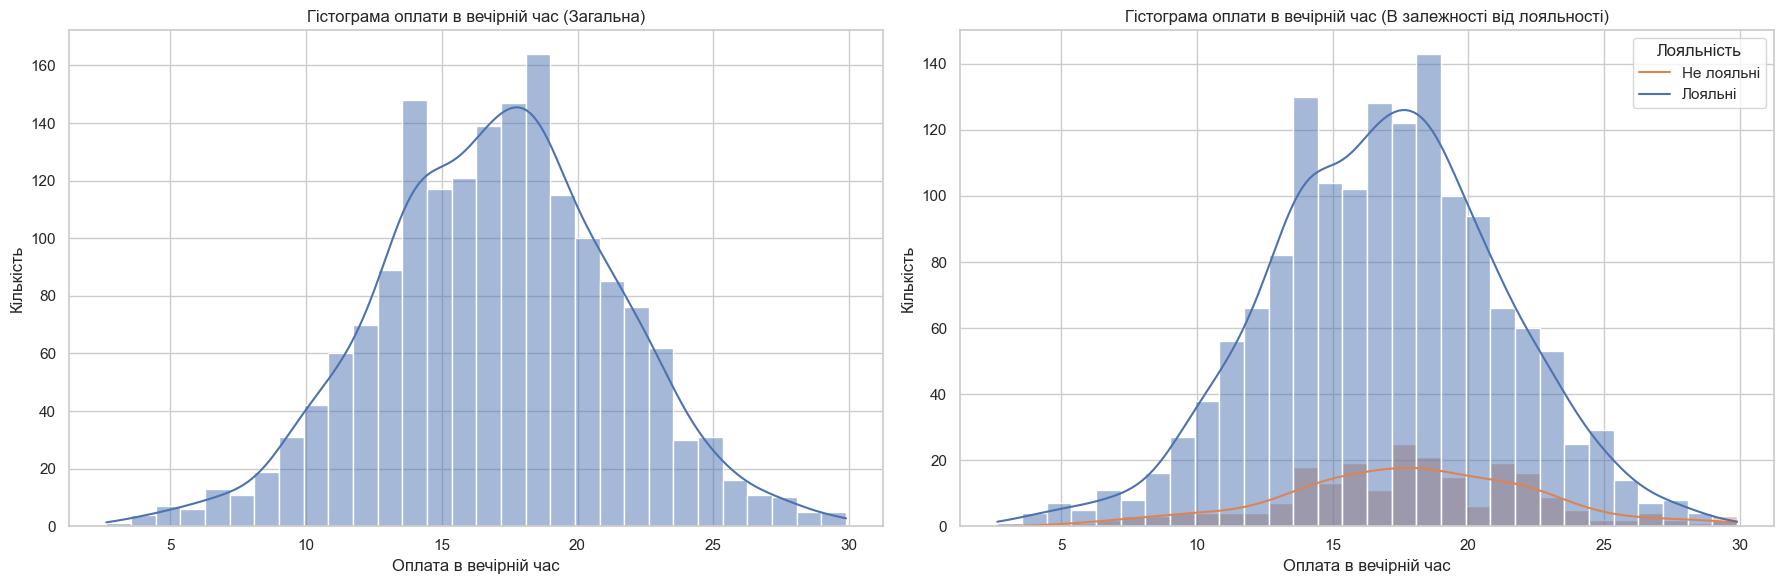

In [51]:
# Creating subplots for evening charge histograms
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Overall histogram of evening charges
sns.histplot(telecom_data['total eve charge'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Гістограма оплати в вечірній час (Загальна)')
axes[0].set_xlabel('Оплата в вечірній час')
axes[0].set_ylabel('Кількість')

# Histogram of evening charges based on customer loyalty (churn)
sns.histplot(data=telecom_data, x='total eve charge', hue='churn', bins=30, ax=axes[1], kde=True)
axes[1].set_title('Гістограма оплати в вечірній час (В залежності від лояльності)')
axes[1].set_xlabel('Оплата в вечірній час')
axes[1].set_ylabel('Кількість')
axes[1].legend(title='Лояльність', labels=['Не лояльні', 'Лояльні'])

plt.tight_layout()
plt.show()

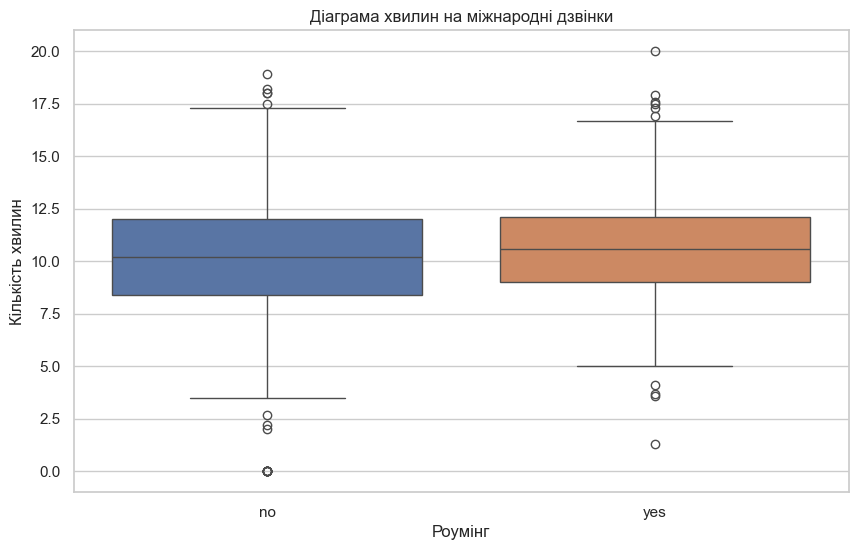

In [52]:
# Boxplot for international minutes with and without international roaming with different colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='international plan', y='total intl minutes', data=telecom_data, hue='international plan')
ax.set_title('Діаграма хвилин на міжнародні дзвінки')
ax.set_xlabel('Роумінг')
ax.set_ylabel('Кількість хвилин')
plt.show()

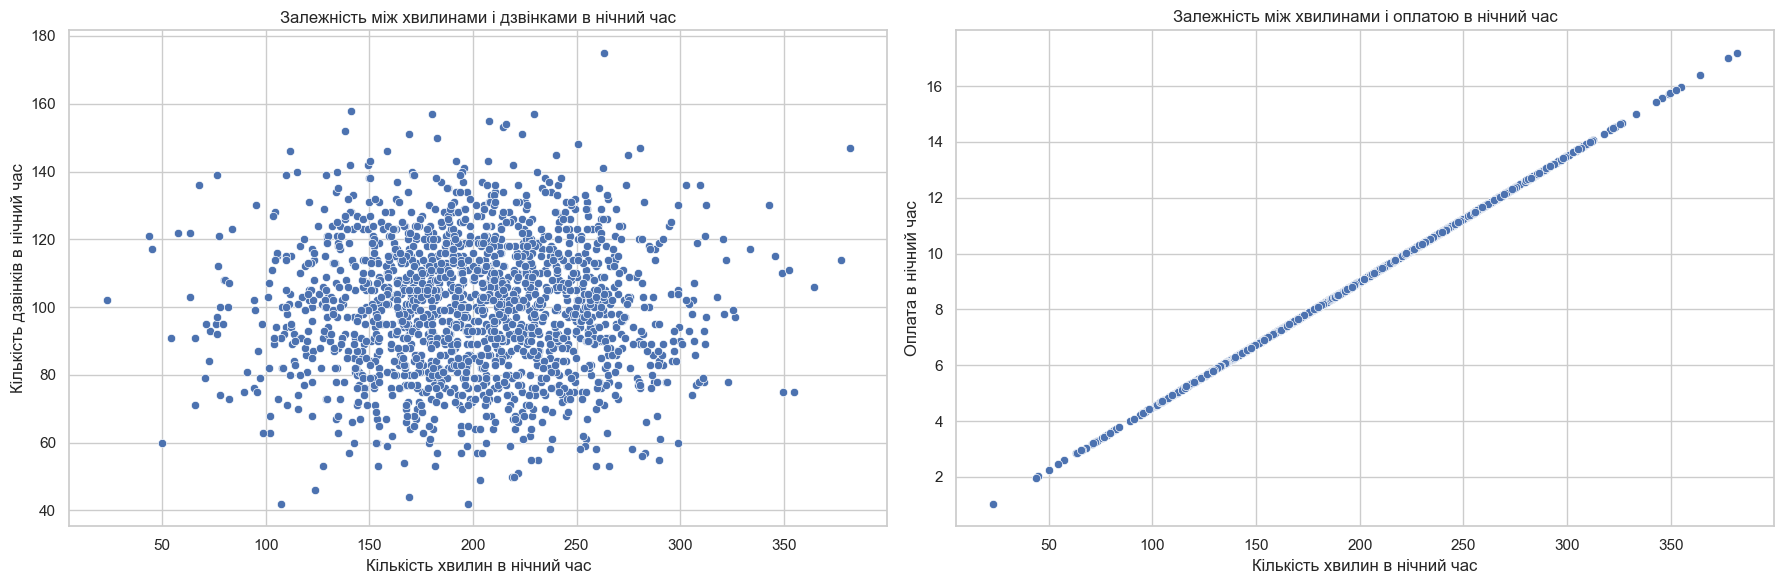

(-0.0018619378942209069, 0.9999992314195643)

In [53]:
# Scatter plot for minutes vs calls at night
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=telecom_data, x='total night minutes', y='total night calls', ax=axes[0])
axes[0].set_title('Залежність між хвилинами і дзвінками в нічний час')
axes[0].set_xlabel('Кількість хвилин в нічний час')
axes[0].set_ylabel('Кількість дзвінків в нічний час')

# Scatter plot for minutes vs charge at night
sns.scatterplot(data=telecom_data, x='total night minutes', y='total night charge', ax=axes[1])
axes[1].set_title('Залежність між хвилинами і оплатою в нічний час')
axes[1].set_xlabel('Кількість хвилин в нічний час')
axes[1].set_ylabel('Оплата в нічний час')

plt.tight_layout()
plt.show()

# Calculating correlation coefficients
corr_minutes_calls = telecom_data['total night minutes'].corr(telecom_data['total night calls'])
corr_minutes_charge = telecom_data['total night minutes'].corr(telecom_data['total night charge'])

corr_minutes_calls, corr_minutes_charge